In [1]:
import sarracen as src
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/

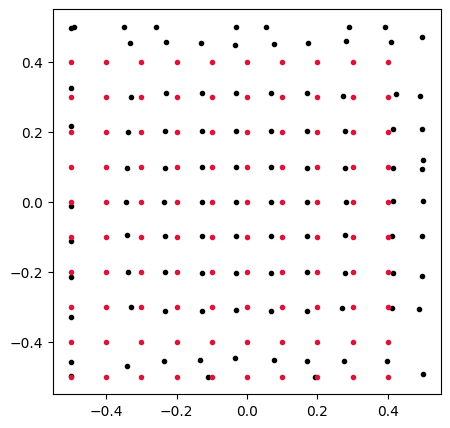

In [2]:
sdf_ini = pd.read_csv('../Data/initial_distribution/ideal_gas.csv')
sdf_n = pd.read_csv('../Data/results/ideal_gas/final.csv')

fig = plt.figure(figsize=(5,5))
plt.plot(sdf_n['x'], sdf_n['y'], '.', color='k')
plt.plot(sdf_ini['x'], sdf_ini['y'], '.', color='crimson')
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.show()

In [3]:
sdf = src.read_csv('../Data/results/ideal_gas/final.csv')
sdf.params={'mass':1.0}
sdf.describe()

,x,y,vx,vy,u,h,rho
count,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000
mean,0.019643,0.020000,-0.100000,-1.110223e-18,1.044499,0.138797,78.753051
std,0.311042,0.311963,0.168292,1.281175e-01,0.214044,0.021117,17.913916
min,-0.499599,-0.499931,-0.988694,-2.945924e-01,0.778685,0.115075,27.636382
25%,-0.233125,-0.206792,-0.161542,-7.320833e-02,0.903607,0.124246,70.537294
50%,0.012182,0.000453,-0.102476,3.197188e-04,0.977506,0.132410,82.133653
75%,0.278826,0.303436,-0.031840,7.308234e-02,1.100772,0.142885,93.282337
max,0.499935,0.499901,0.547578,5.150895e-01,1.929379,0.228266,108.737805


In [4]:
sdf1 = src.read_csv('../Data/results/ideal_gas/final.csv')
sdf1.params={'mass':1.0}
sdf1.describe()

,x,y,vx,vy,u,h,rho
count,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000
mean,0.019643,0.020000,-0.100000,-1.110223e-18,1.044499,0.138797,78.753051
std,0.311042,0.311963,0.168292,1.281175e-01,0.214044,0.021117,17.913916
min,-0.499599,-0.499931,-0.988694,-2.945924e-01,0.778685,0.115075,27.636382
25%,-0.233125,-0.206792,-0.161542,-7.320833e-02,0.903607,0.124246,70.537294
50%,0.012182,0.000453,-0.102476,3.197188e-04,0.977506,0.132410,82.133653
75%,0.278826,0.303436,-0.031840,7.308234e-02,1.100772,0.142885,93.282337
max,0.499935,0.499901,0.547578,5.150895e-01,1.929379,0.228266,108.737805


In [5]:
np.sum(np.sum(sdf1 != sdf))

0

<Axes: xlabel='x', ylabel='y'>

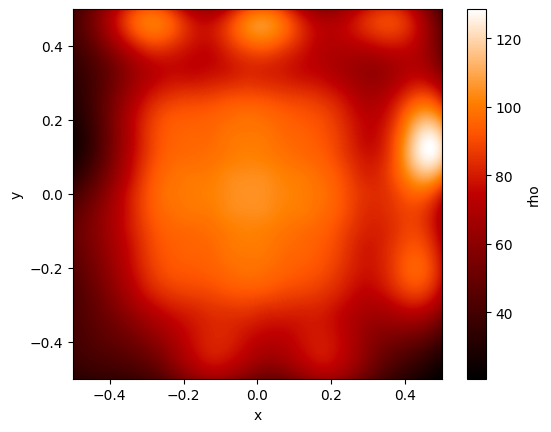

In [6]:
sdf.render('rho', xsec=0.0)

In [7]:
# Angular Momentum
def angular_momentum(x, y, vx, vy):
    return x*vy - y*vx

In [8]:
T = 7
time = range(0, T)
ang_mom = np.zeros(T)

fig = plt.figure()

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/ideal_gas/' + str(ii) + ".csv")
    df.params={'mass': 2.0/df.shape[0]}
    plt.clf()
    ang_mom[ii-1] = np.sum(angular_momentum(df['x'], df['y'], df['vx'], df['vy']))
plt.show()

<Figure size 640x480 with 0 Axes>

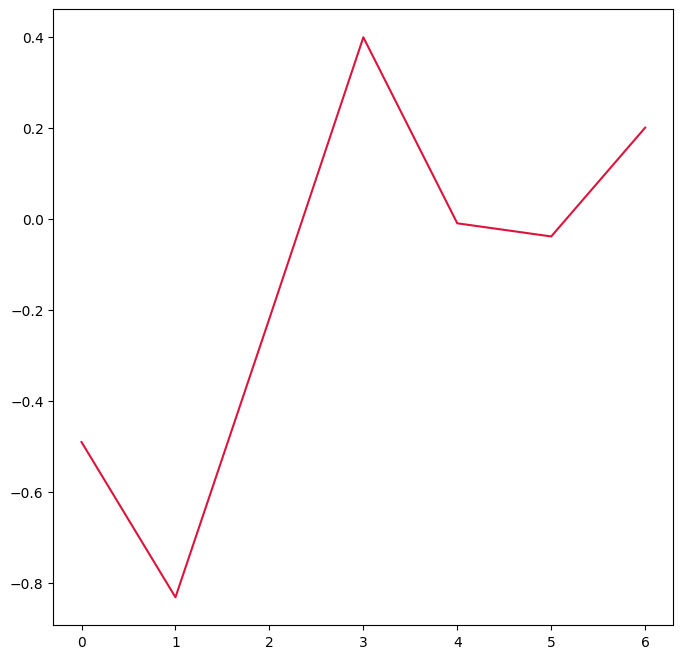

In [9]:
fig = plt.figure(figsize=(8,8))
plt.plot(time, ang_mom, '-', color='crimson')
plt.show()